In [14]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.11/site-packages/talib --strip-components=3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0tar: Error opening archive: Failed to open '\\.\tape0'

100  4279    0  4279    0     0  29820      0 --:--:-- --:--:-- --:--:-- 30784

  1  517k    1  8390    0     0  29757      0  0:00:17 --:--:--  0:00:17 29757
curl: (23) Failure writing output to destination
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0tar: Error opening archive: Failed to open '\\.\tape0'

100  4291    0  4291    0     0  26786      0 --:--:-- --:--:-- --:--:-- 27331

  4  392k    4 17817    0     0  62650      0  0:00:06 --:--:--  0:00:06 62650
curl: (23) Failure writing output to destinatio

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import talib

data_folder = '../data'

path = os.path.join(data_folder, 'tv_season_race_gender_count_total.csv')

# Configurations

In [16]:
MOVING_AVERAGE_PERIOD = 5

FIRST_YEAR = 1970 - MOVING_AVERAGE_PERIOD + 1


# Define a color map for different ethnicities with gender shades
color_map = {
    "asian_Male": "#1f77b4",     # Darker blue
    "asian_Female": "#aec7e8",   # Lighter blue
    "black_Male": "#ff7f0e",     # Darker orange
    "black_Female": "#ffbb78",   # Lighter orange
    "white_Male": "#2ca02c",     # Darker green
    "white_Female": "#98df8a",   # Lighter green,
    "indian_Male": "#9467bd",    # Darker purple
    "indian_Female": "#c5b0d5",  # Lighter purple
    "latino hispanic_Male": "#8c564b",        # Darker brown
    "latino hispanic_Female": "#c49c94",      # Lighter brown
    "middle eastern_Male": "#d62728",       # Darker red
    "middle eastern_Female": "#ea9393",     # Lighter red
}

# Define a color map for different ethnicities
color_map_ethnicities = {
    "asian": "#1f77b4",         # Blue
    "black": "#ff7f0e",         # Orange
    "white": "#2ca02c",         # Green
    "indian": "#9467bd",        # Purple
    "latino hispanic": "#8c564b",    # Brown
    "middle eastern": "#d62728",   # Red
}


# Data Retrieval & Cleaning

In [17]:
# Load the data
path = os.path.join(data_folder, 'tv_season_race_gender_count_total.csv')
df = pd.read_csv(path)
# df = df.filter(regex='^(?!.*_Undetermined).*$', axis=1)
# df = df.filter(regex='^(?!.*_Undetermined|.*indian|.*middle eastern).*$', axis=1)
df = df.filter(regex='^(?!.*_Undetermined|.*indian|.*hispanic|.*middle eastern).*$', axis=1)

# Load the season data
path2 = os.path.join(data_folder, 'tv_show_season_details.csv')
df2 = pd.read_csv(path2)

# Exclude data from 2020 onwards
df2 = df2[df2['season_air_date'] < '2020-01-01']
# df2 = df2[df2['season_air_date'].apply(lambda x: pd.Timestamp(x).year) >= FIRST_YEAR]

# Extract the year from season_air_date
df2['year'] = df2['season_air_date'].apply(lambda x: pd.Timestamp(x).year)
df2 = df2[df2['year'] >= FIRST_YEAR]
selected_years = sorted(df2['year'].unique())


In [18]:
df.columns

Index(['show_id', 'season_number', 'asian_Female', 'asian_Male',
       'black_Female', 'black_Male', 'white_Female', 'white_Male'],
      dtype='object')

# Moving average of total count per race & gender

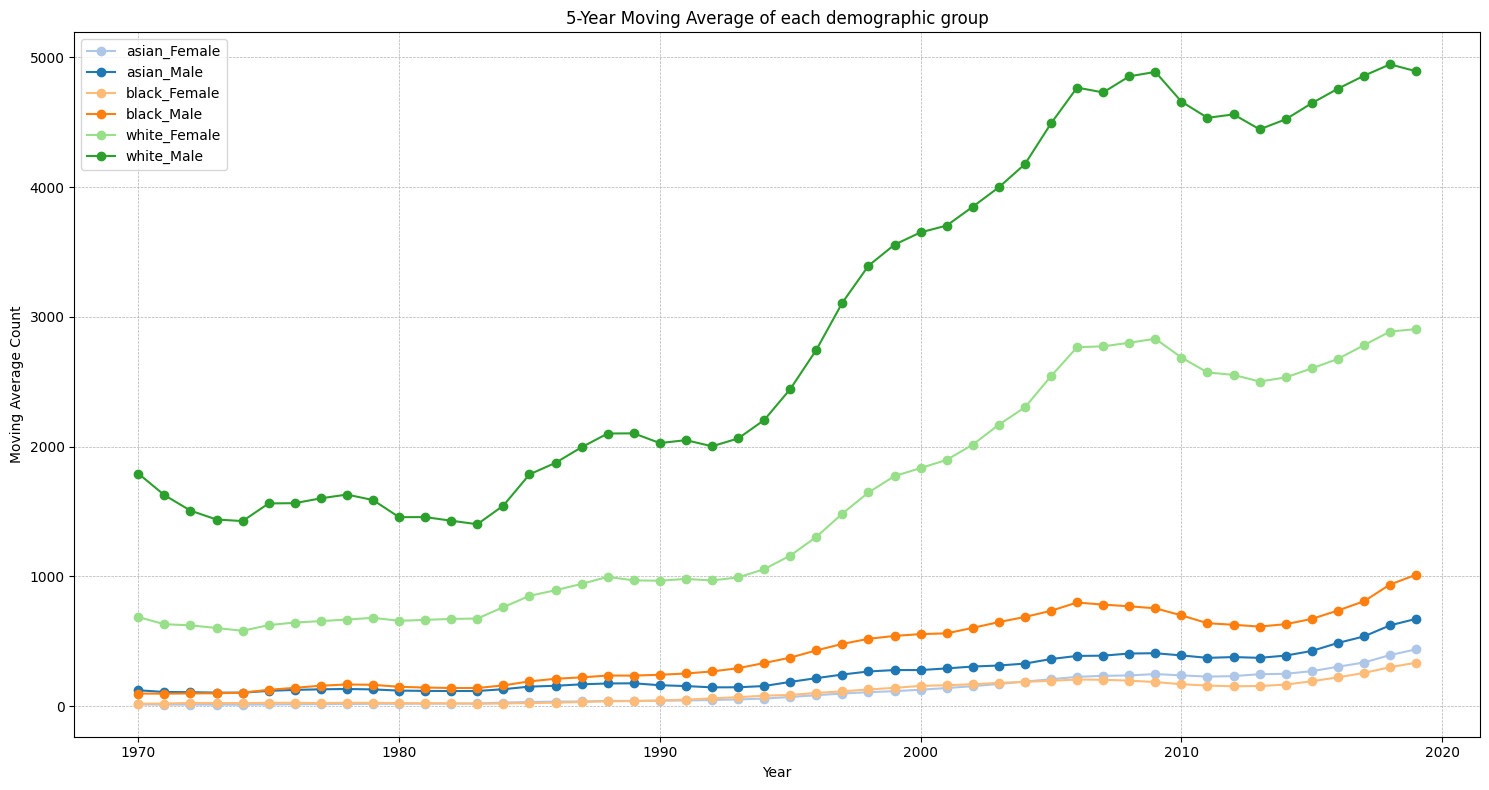

In [19]:
# Merge datasets
merged_df = pd.merge(df, df2[['show_id', 'season_number', 'year']], on=['show_id', 'season_number'], how='left')

# Drop NaN values
merged_df.dropna(subset=['year'], inplace=True)

# Define the demographic groups
demographic_groups = [col for col in df.columns if ("_Male" in col or "_Female" in col or "_Undetermined" in col)]

# Initialize a DataFrame to store counts across years
counts_df = pd.DataFrame(index=selected_years)

# Populate counts_df with the total counts for each demographic group across each year
for group in demographic_groups:
    counts_df[group] = merged_df.groupby('year')[group].sum()

# Compute MOVING_AVERAGE_PERIOD-year moving averages
counts_df_moving_avg = counts_df.rolling(window=MOVING_AVERAGE_PERIOD).mean()

# Plotting
plt.figure(figsize=(15, 8))
for group in demographic_groups:
    plt.plot(counts_df_moving_avg.index, counts_df_moving_avg[group], label=group, marker='o', color=color_map[group])

plt.title(f"{MOVING_AVERAGE_PERIOD}-Year Moving Average of each demographic group")
plt.xlabel("Year")
plt.ylabel("Moving Average Count")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Log Scale

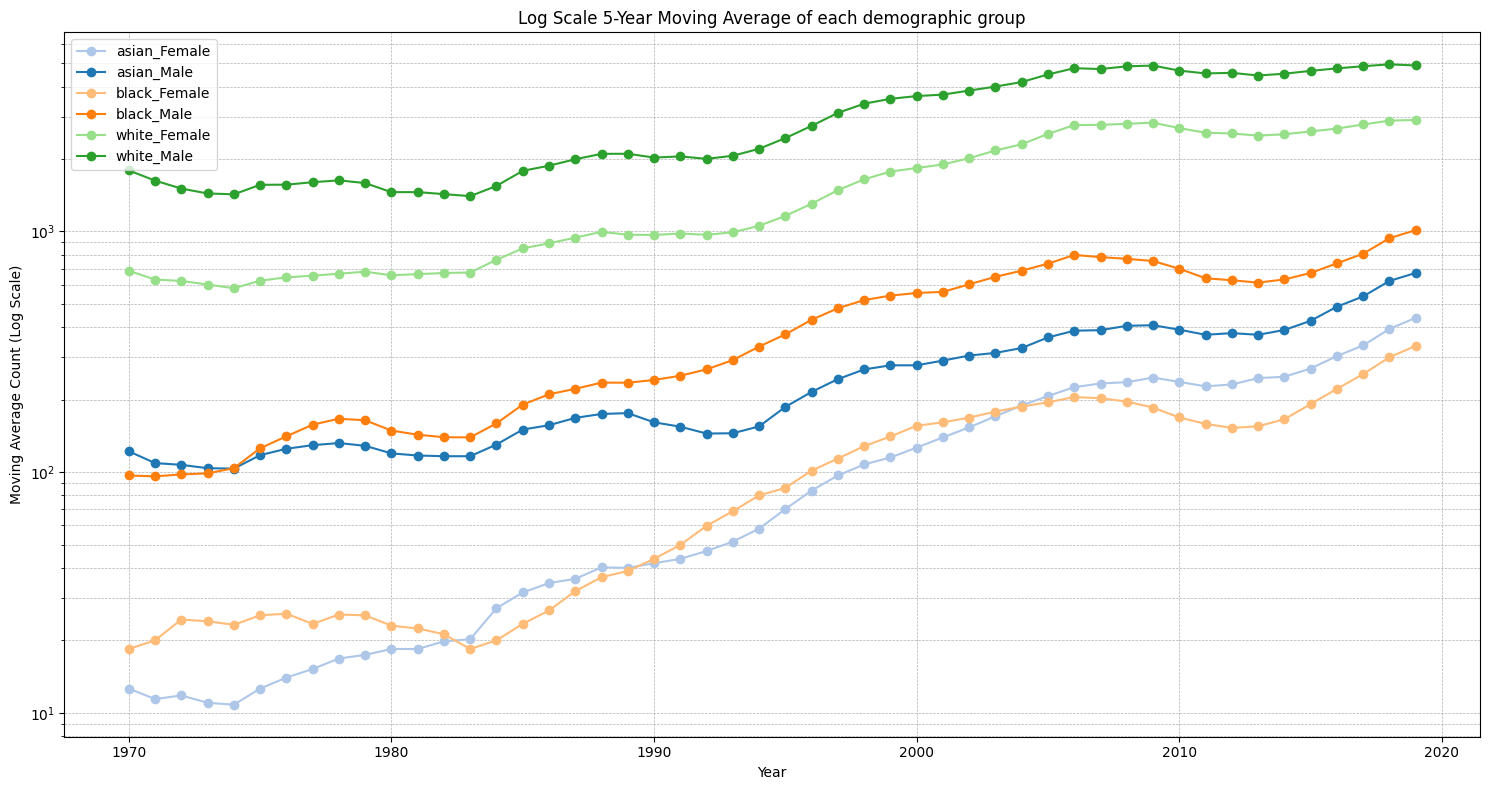

In [20]:

# Merge datasets
merged_df = pd.merge(df, df2[['show_id', 'season_number', 'year']], on=['show_id', 'season_number'], how='left')

# Drop NaN values
merged_df.dropna(subset=['year'], inplace=True)

# Define the demographic groups
demographic_groups = [col for col in df.columns if ("_Male" in col or "_Female" in col or "_Undetermined" in col)]

# Initialize a DataFrame to store counts across years
counts_df = pd.DataFrame(index=selected_years)

# Populate counts_df with the total counts for each demographic group across each year
for group in demographic_groups:
    counts_df[group] = merged_df.groupby('year')[group].sum()

# Compute MOVING_AVERAGE_PERIOD-year moving averages
counts_df_moving_avg = counts_df.rolling(window=MOVING_AVERAGE_PERIOD).mean()

# Plotting with log scale for the y-axis
plt.figure(figsize=(15, 8))
for group in demographic_groups:
    plt.plot(counts_df_moving_avg.index, counts_df_moving_avg[group], label=group, marker='o', color=color_map[group])

plt.yscale('log')
plt.title(f"Log Scale {MOVING_AVERAGE_PERIOD}-Year Moving Average of each demographic group")
plt.xlabel("Year")
plt.ylabel("Moving Average Count (Log Scale)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Moving average of female percentage of each race

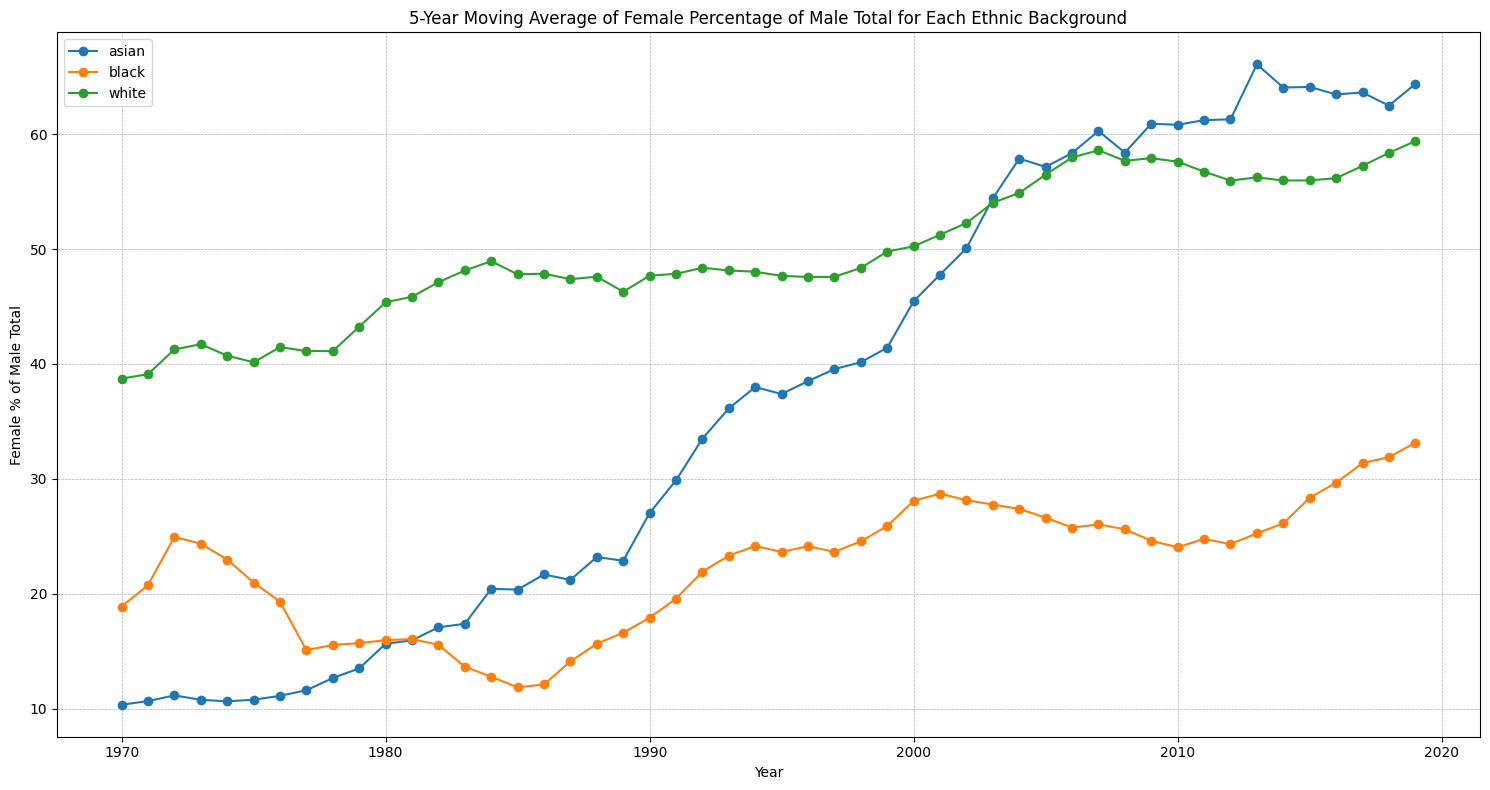

In [21]:
# Merge datasets
merged_df = pd.merge(df, df2[['show_id', 'season_number', 'year']], on=['show_id', 'season_number'], how='left')

# Drop NaN values
merged_df.dropna(subset=['year'], inplace=True)

# Define the ethnic backgrounds
ethnic_backgrounds = ['asian', 'black', 'white']
# ethnic_backgrounds = ['asian', 'black', 'white', 'latino hispanic']
# ethnic_backgrounds = ['asian', 'black', 'white', 'indian', 'latino hispanic', 'middle eastern']

# Initialize a DataFrame to store counts across years
ratio_df = pd.DataFrame(index=selected_years)

# Populate ratio_df with the female percentage of the male total for each ethnic background across each year
for background in ethnic_backgrounds:
    male_column = background + "_Male"
    female_column = background + "_Female"
    ratio_df[background] = (merged_df.groupby('year')[female_column].sum() / merged_df.groupby('year')[male_column].sum()) * 100

# Compute MOVING_AVERAGE_PERIOD-year moving averages
ratio_df_moving_avg = ratio_df.rolling(window=MOVING_AVERAGE_PERIOD).mean()


# Plotting
plt.figure(figsize=(15, 8))
for background in ethnic_backgrounds:
    plt.plot(ratio_df_moving_avg.index, ratio_df_moving_avg[background], label=background, marker='o', color=color_map_ethnicities[background])

plt.title(f"{MOVING_AVERAGE_PERIOD}-Year Moving Average of Female Percentage of Male Total for Each Ethnic Background")
plt.xlabel("Year")
plt.ylabel("Female % of Male Total")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# Moving Average Correlation between race & gender

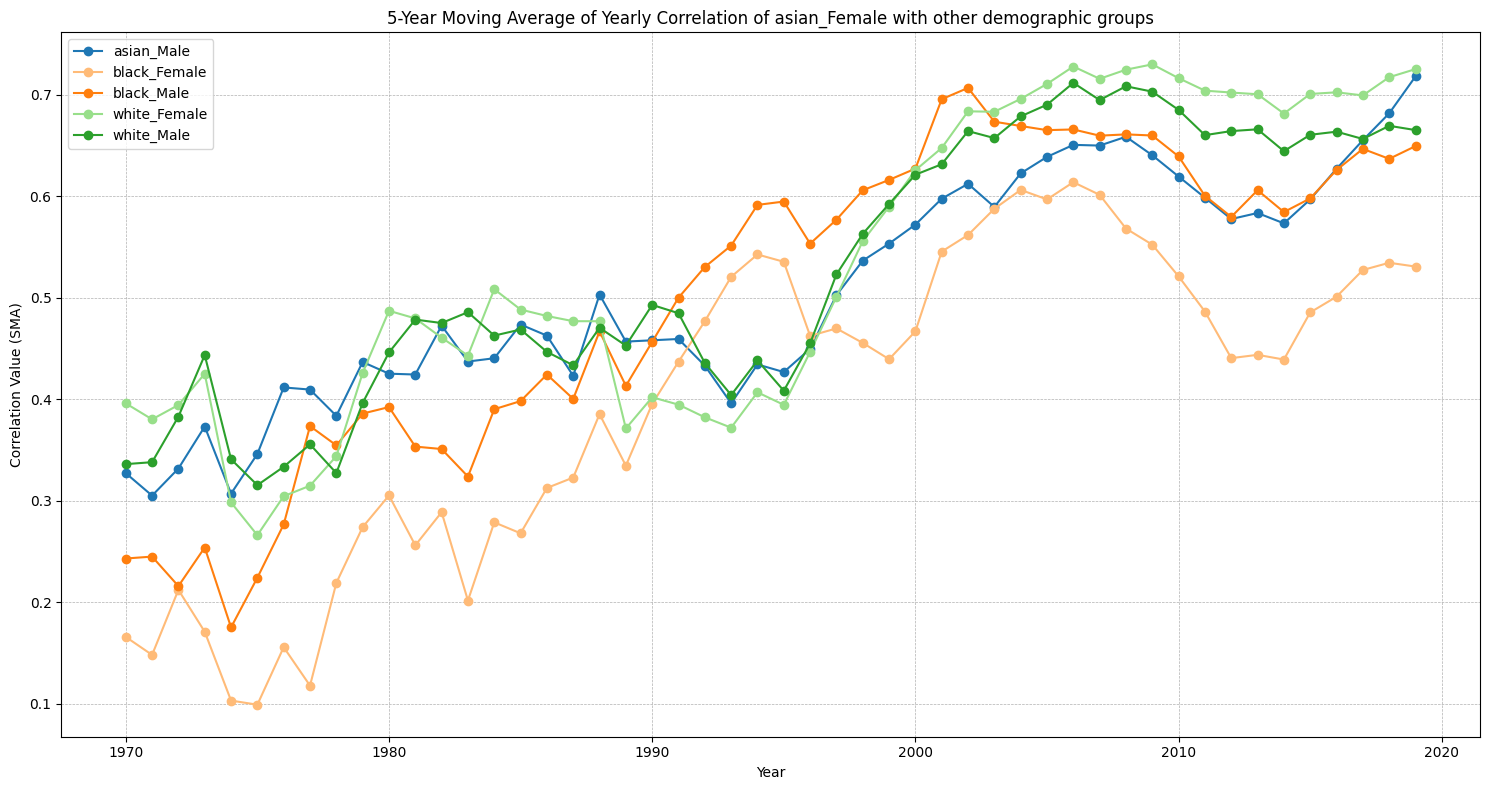

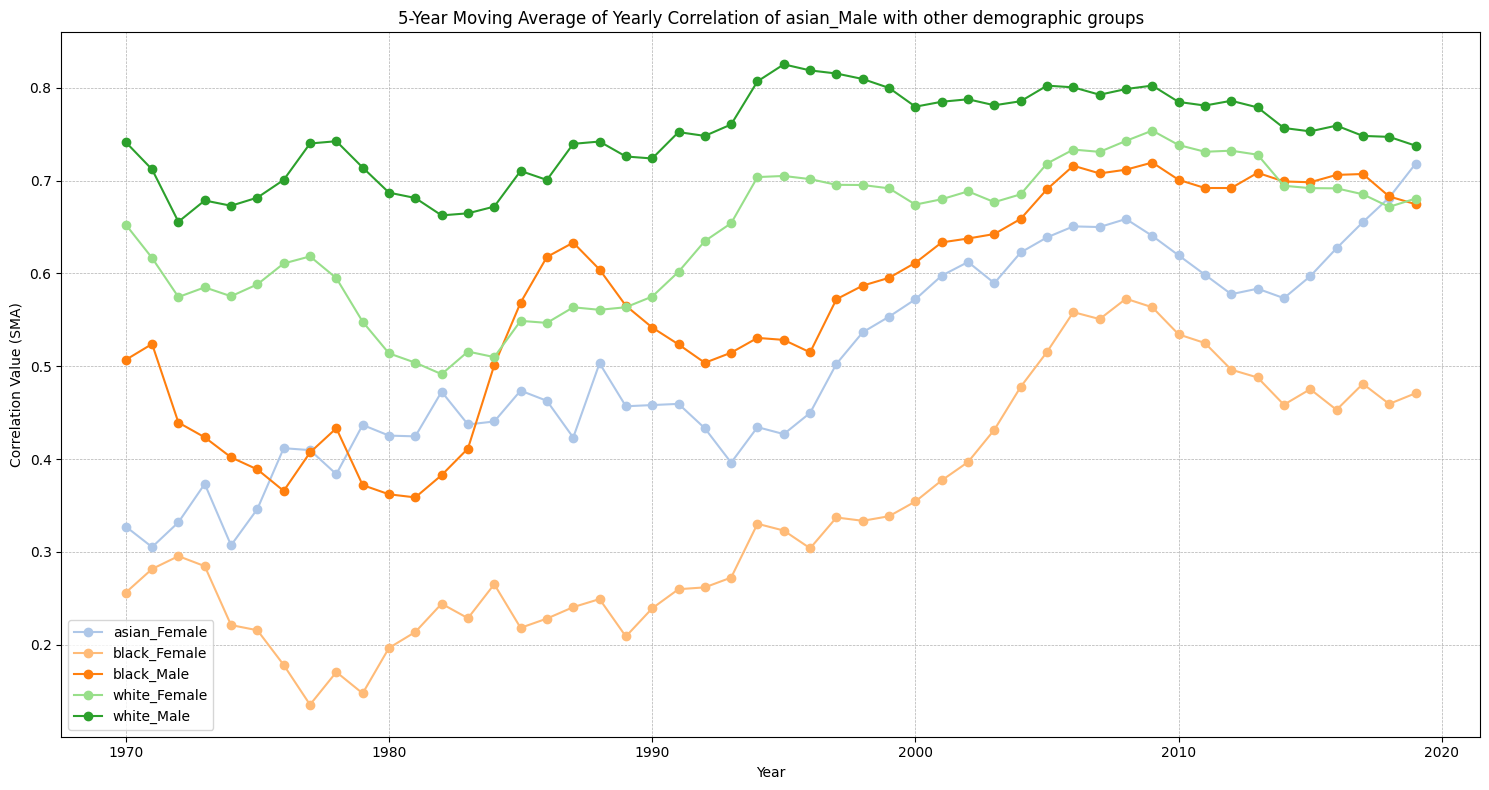

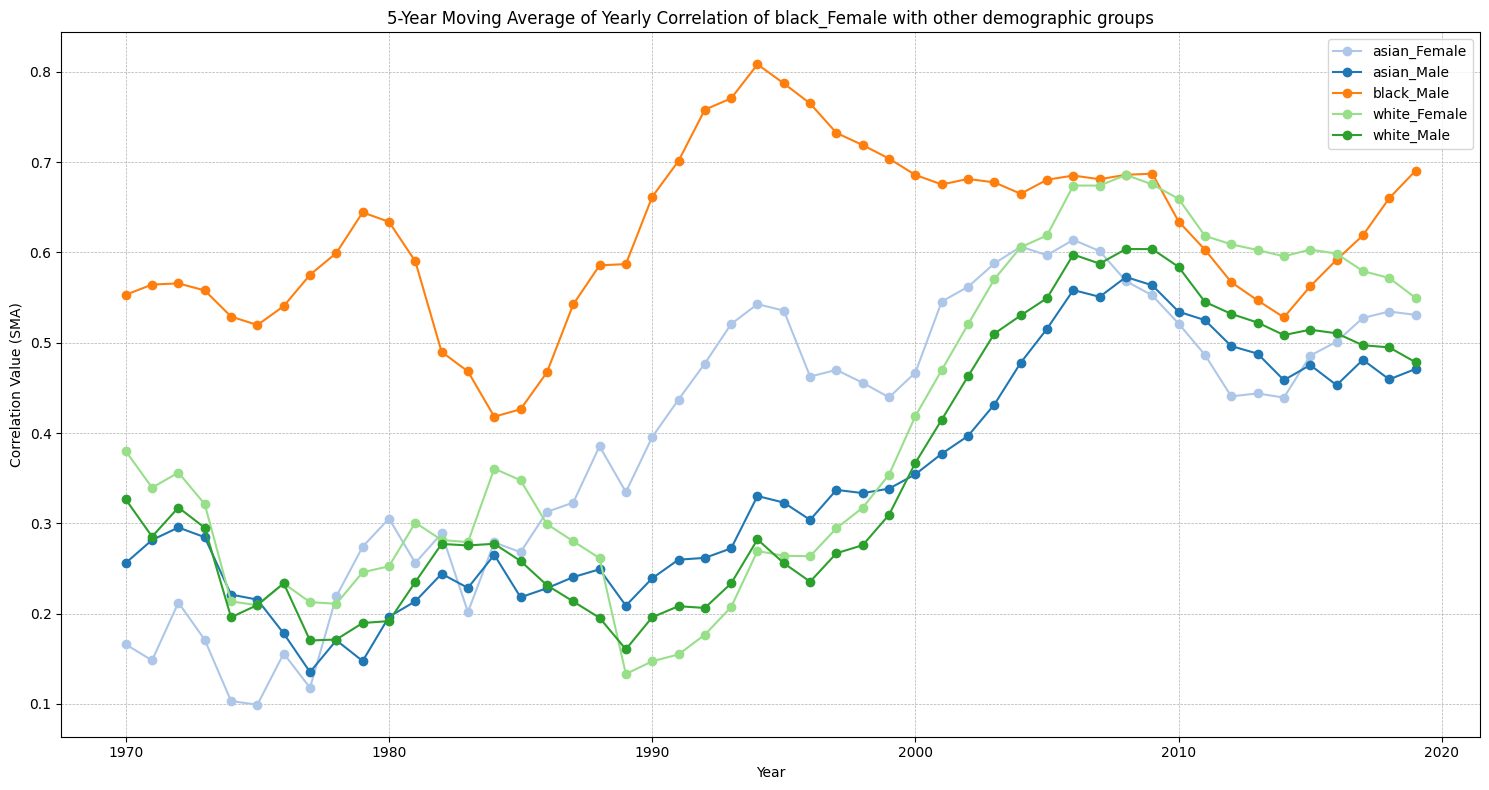

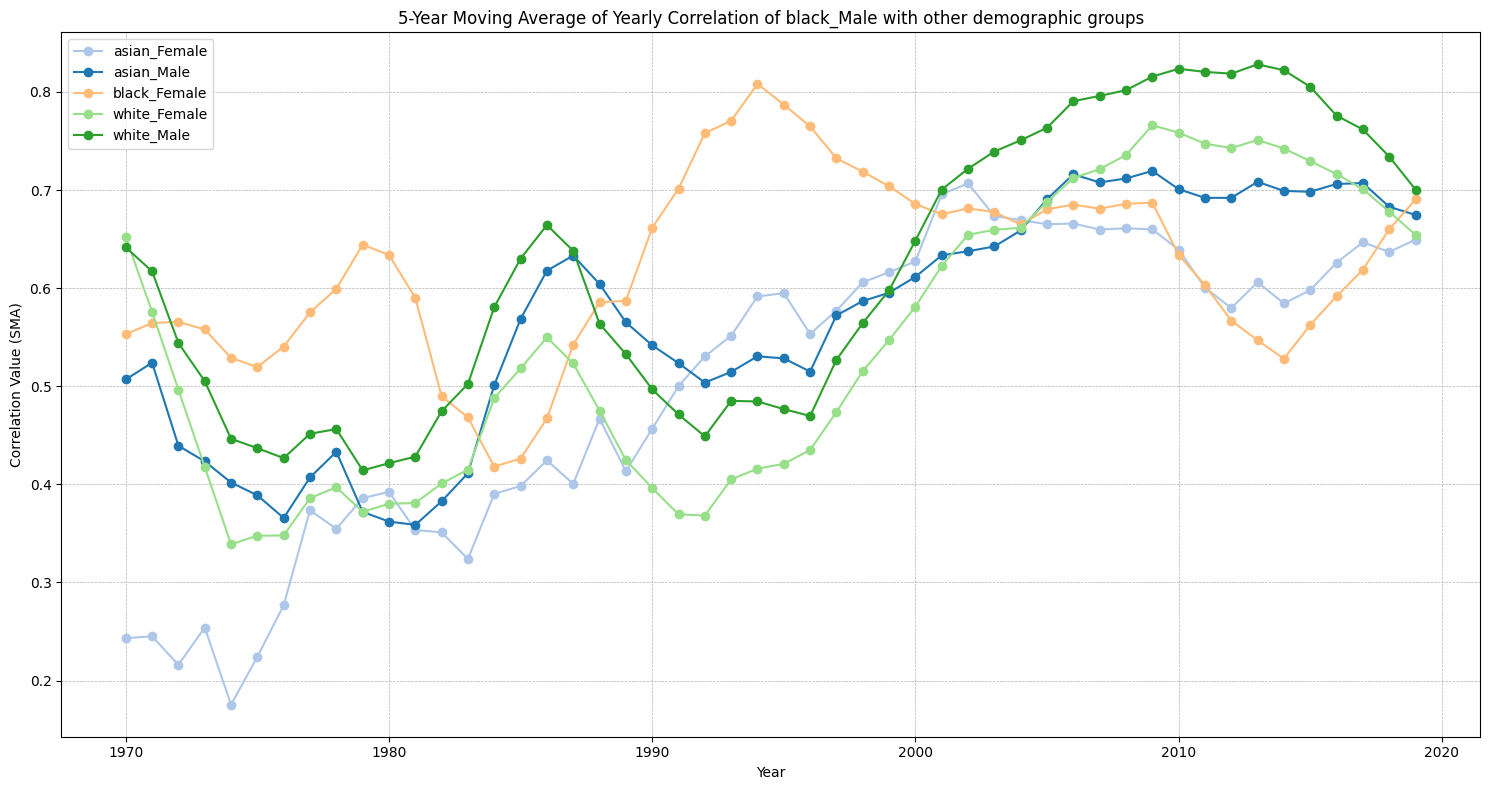

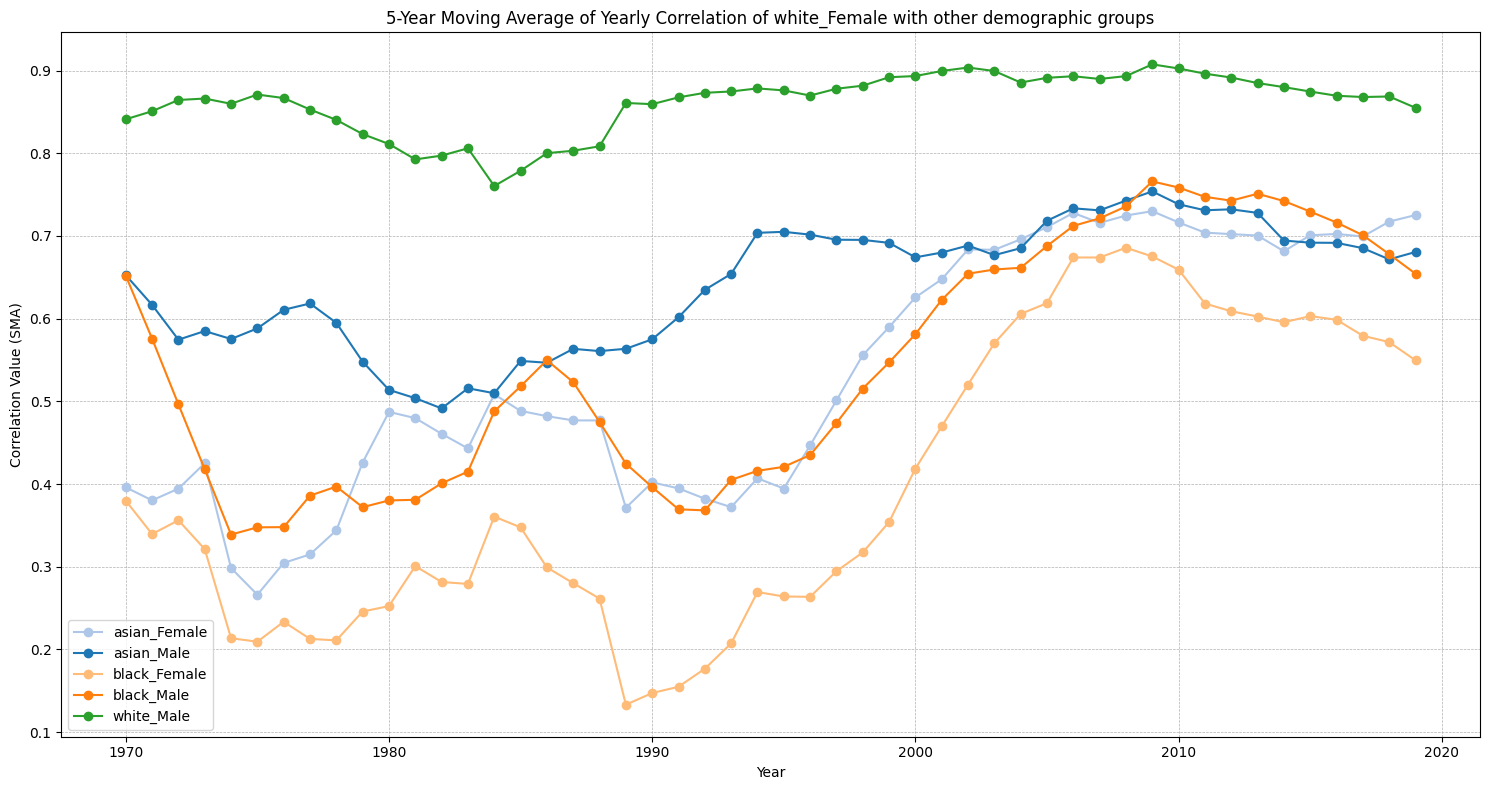

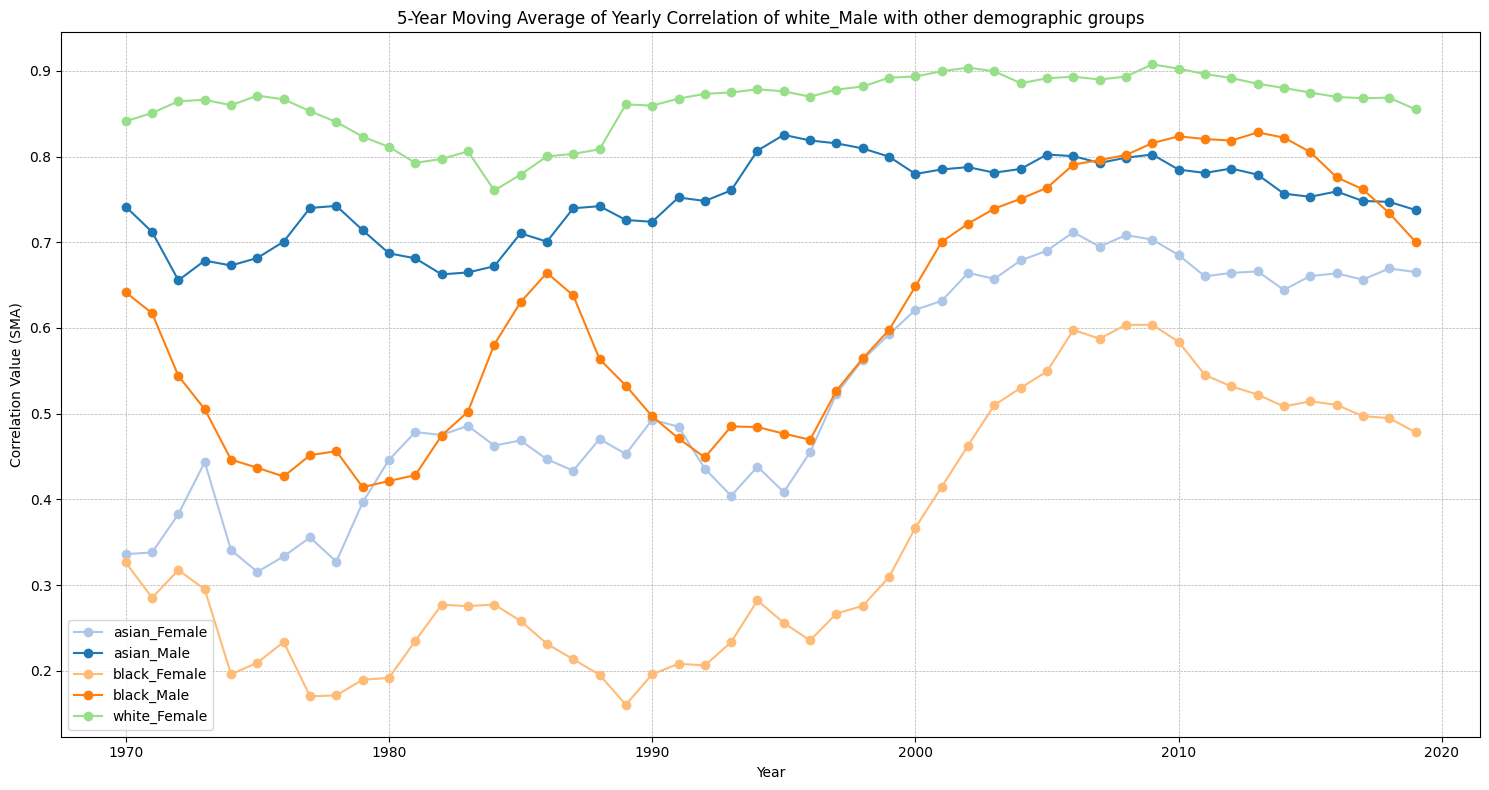

In [22]:
# Merge datasets
merged_df = pd.merge(df, df2[['show_id', 'season_number', 'year']], on=['show_id', 'season_number'], how='left')

# Drop NaN values
merged_df.dropna(subset=['year'], inplace=True)

# Define the demographic groups
demographic_groups = [col for col in df.columns if ("_Male" in col or "_Female" in col)]

# Function to compute yearly correlations
def compute_yearly_correlations(target_year, main_group, df):
    period_df = df[df['year'] == target_year]
    correlations = period_df.corr()[main_group]
    return correlations

# Iterate over each demographic group
for main_group in demographic_groups:
    correlation_df = pd.DataFrame(index=selected_years, columns=demographic_groups)
    other_groups = [col for col in demographic_groups if col != main_group]

    for year in selected_years:
        filtered_correlations = compute_yearly_correlations(year, main_group, merged_df)
        # Explicitly set values for each group
        for group in other_groups:
            if group in filtered_correlations:
                correlation_df.at[year, group] = filtered_correlations[group]

    # Compute moving averages using talib
    for group in other_groups:
        values_as_float64 = correlation_df[group].astype('float64').values
        correlation_df[group + "_SMA"] = talib.SMA(values_as_float64, timeperiod=MOVING_AVERAGE_PERIOD)

    # Plotting
    plt.figure(figsize=(15, 8))
    for group in other_groups:
        plt.plot(correlation_df.index, correlation_df[group + "_SMA"], label=group, marker='o', color=color_map[group])

    plt.title(f"{MOVING_AVERAGE_PERIOD}-Year Moving Average of Yearly Correlation of {main_group} with other demographic groups")
    plt.xlabel("Year")
    plt.ylabel("Correlation Value (SMA)")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


# Yearly Correlation between race & gender

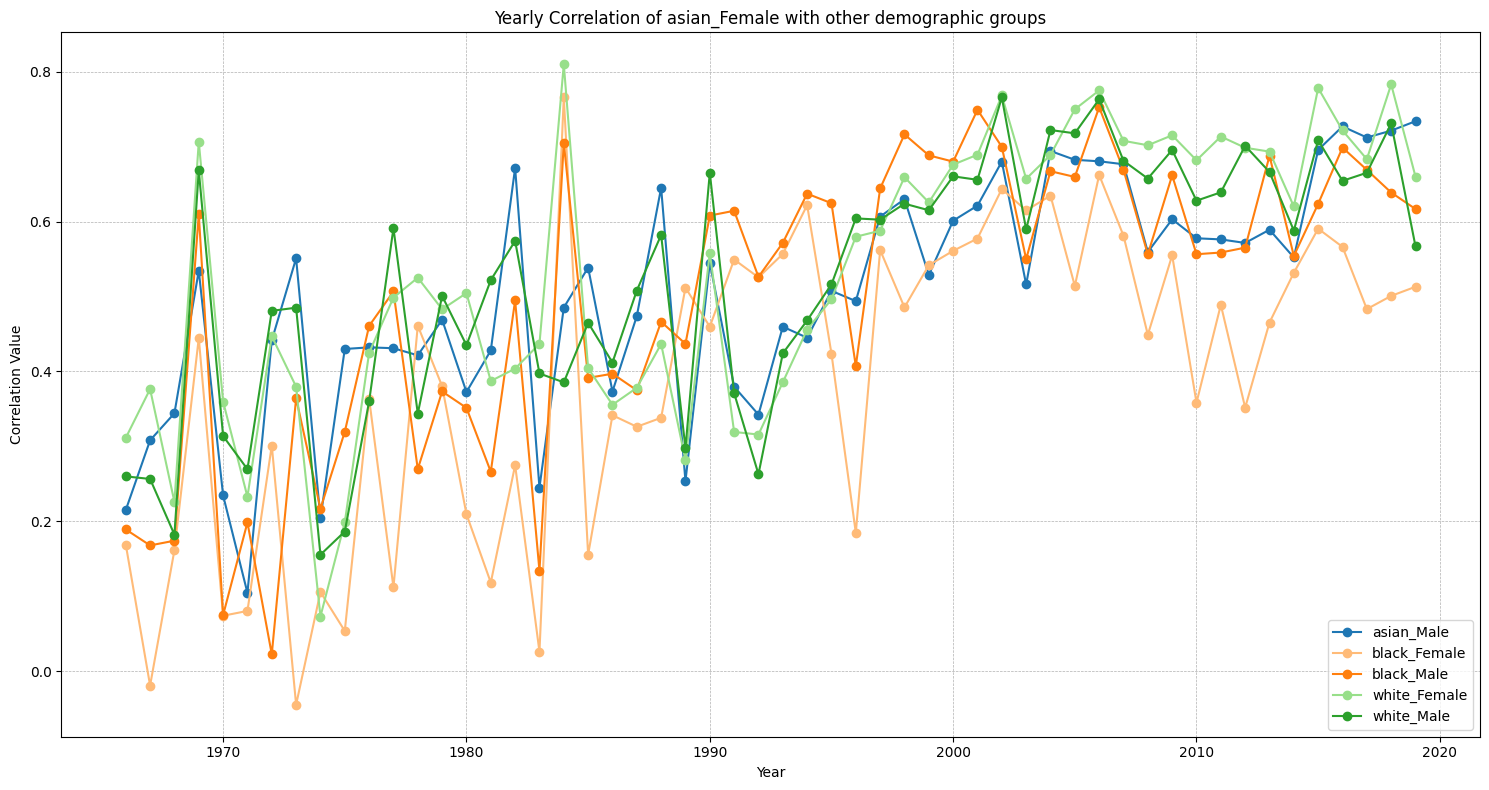

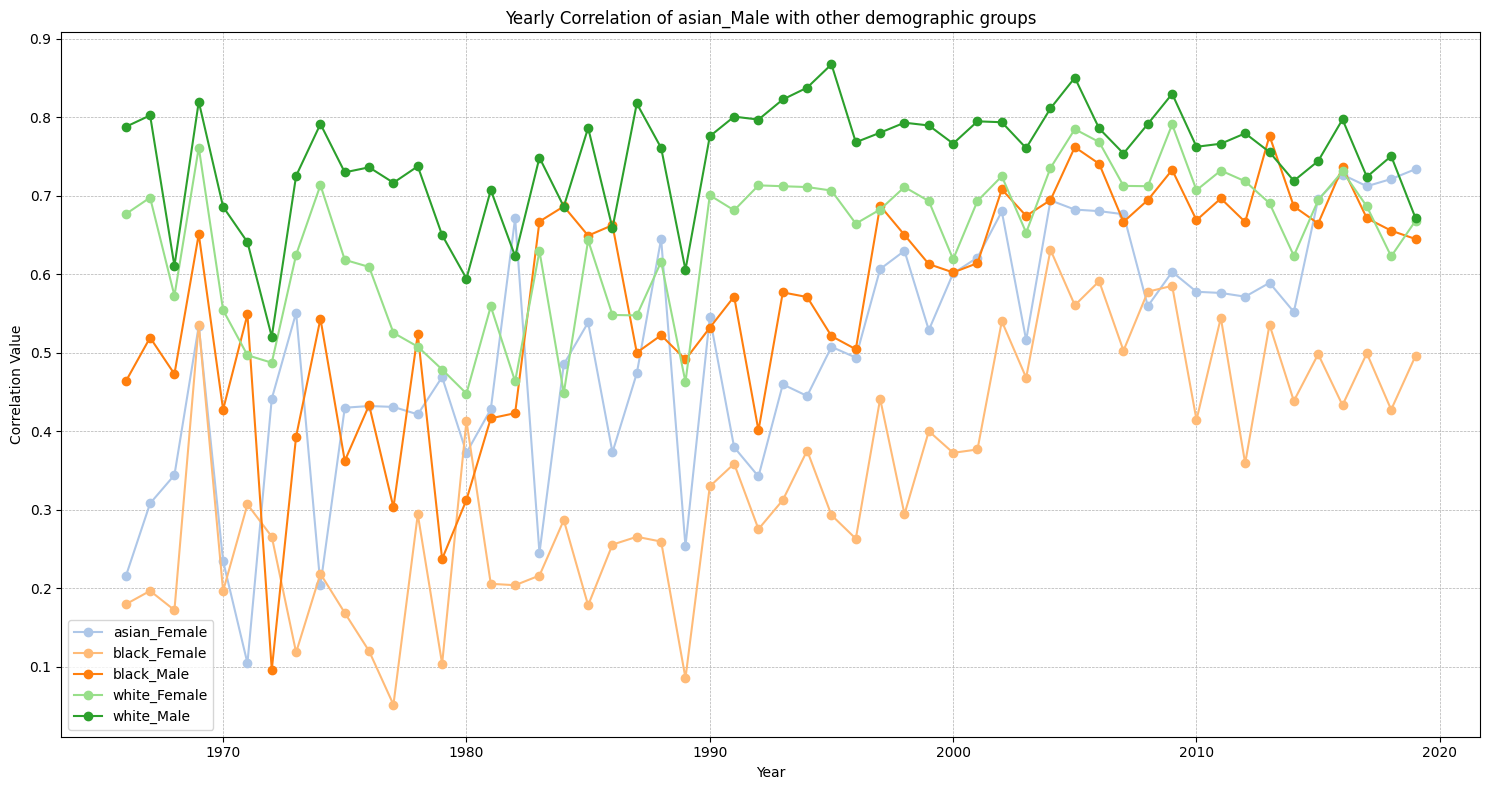

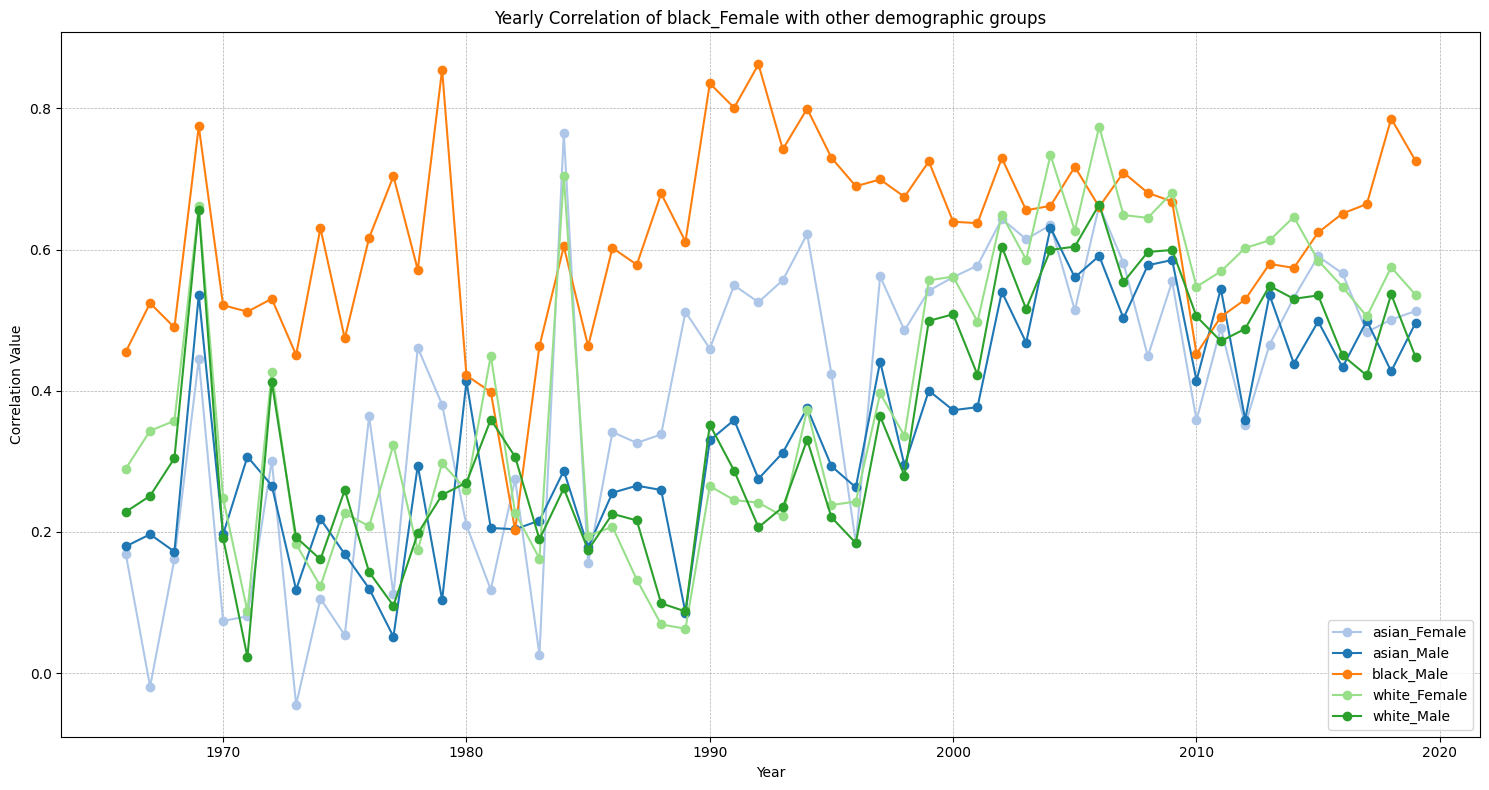

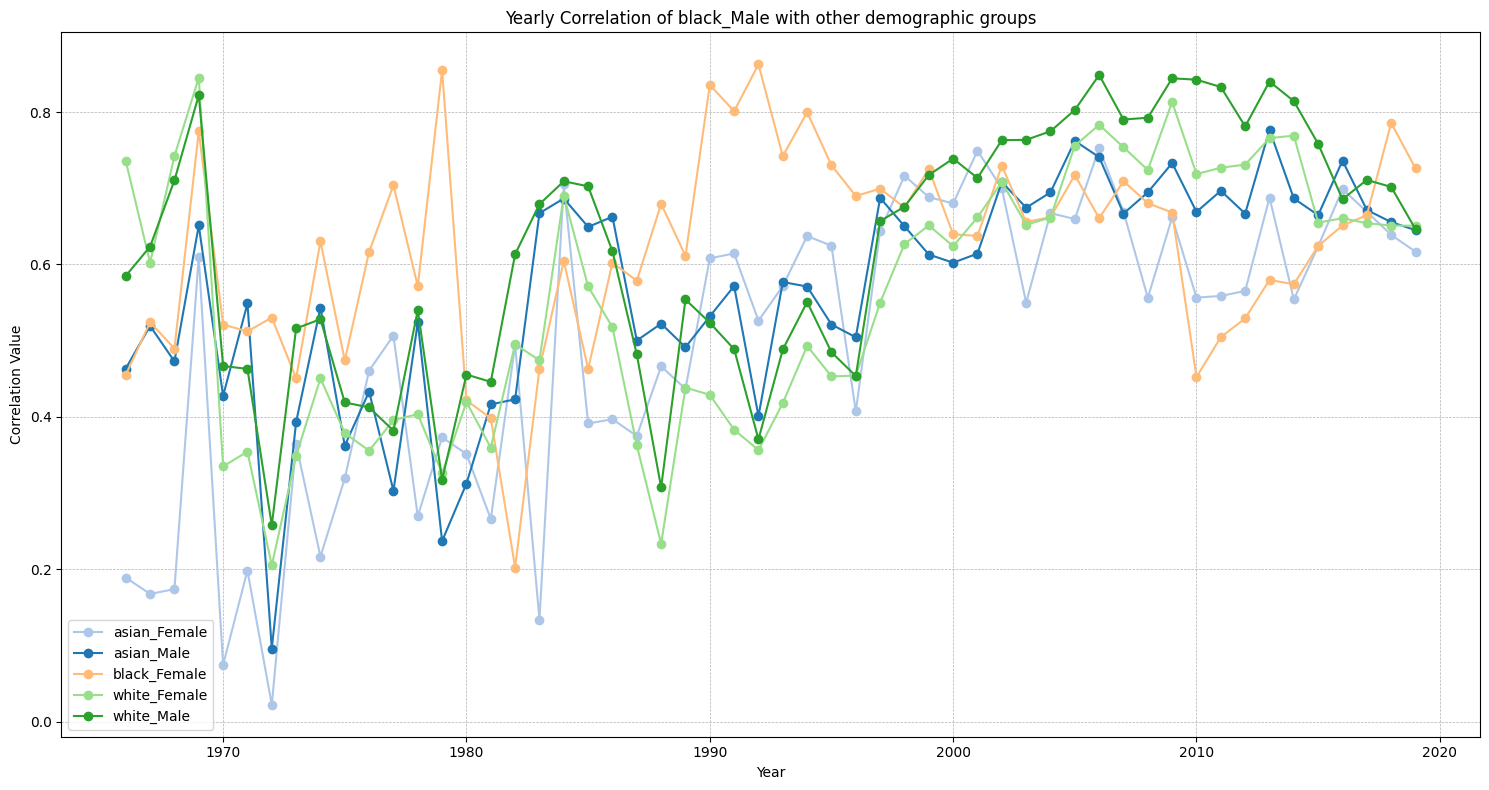

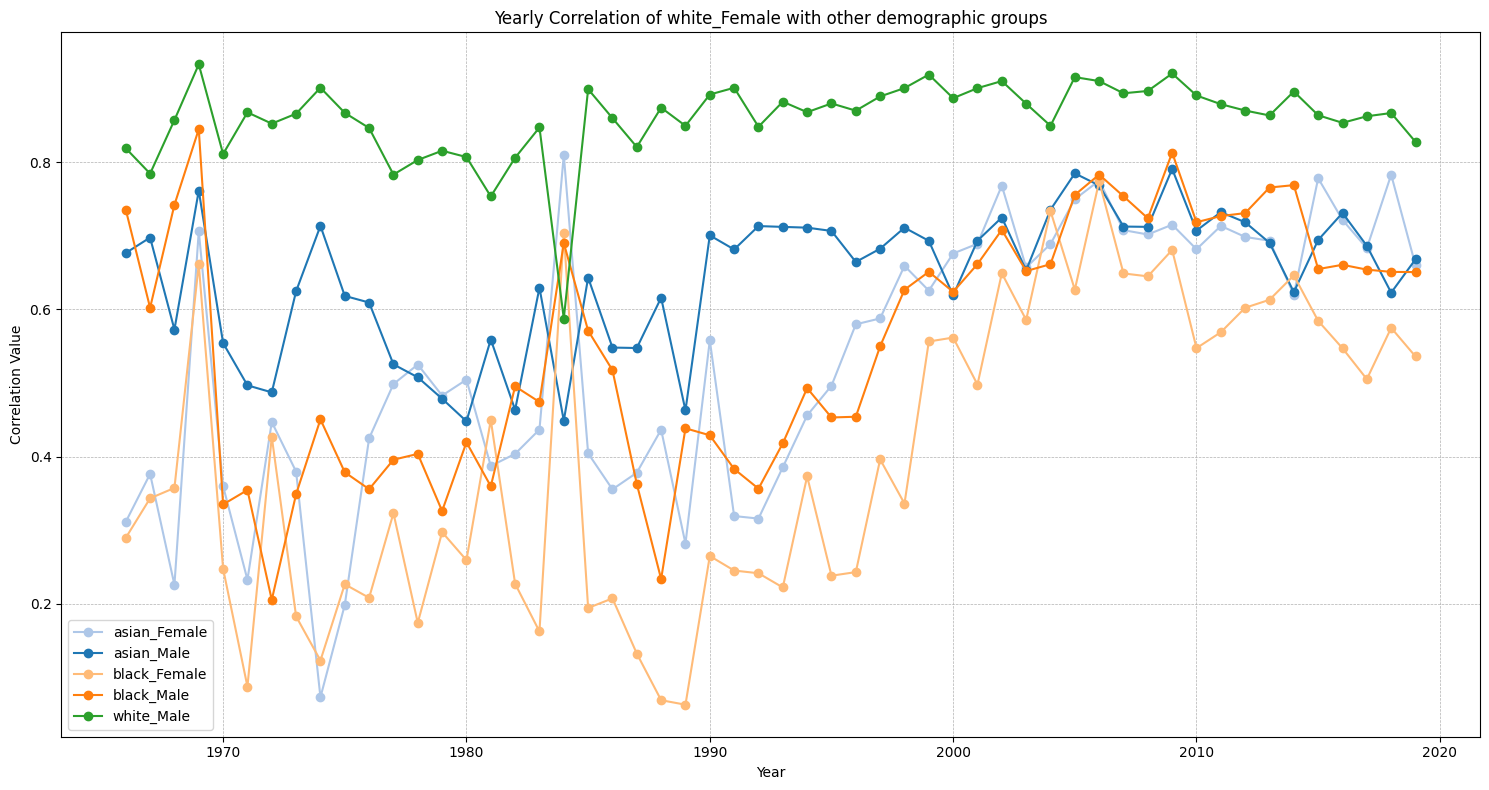

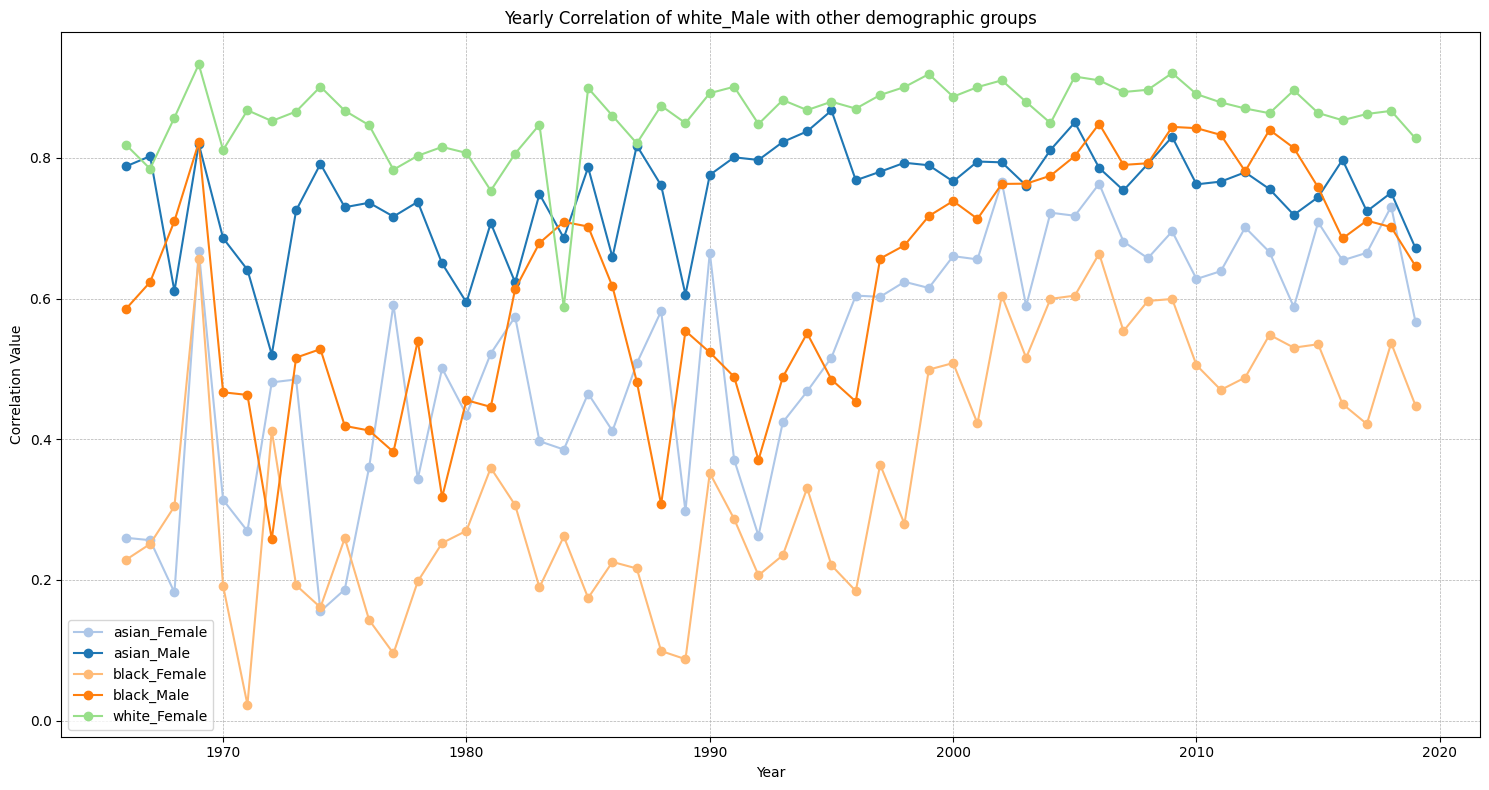

In [23]:
# Merge datasets
merged_df = pd.merge(df, df2[['show_id', 'season_number', 'year']], on=['show_id', 'season_number'], how='left')

# Drop NaN values
merged_df.dropna(subset=['year'], inplace=True)

# Define the demographic groups
demographic_groups = [col for col in df.columns if ("_Male" in col or "_Female" in col)]

# Function to compute yearly correlations
def compute_yearly_correlations(target_year, main_group, df):
    period_df = df[df['year'] == target_year]
    correlations = period_df.corr()[main_group]
    return correlations

# Iterate over each demographic group
for main_group in demographic_groups:
    correlation_df = pd.DataFrame(index=selected_years, columns=demographic_groups)
    other_groups = [col for col in demographic_groups if col != main_group]

    for year in selected_years:
        filtered_correlations = compute_yearly_correlations(year, main_group, merged_df)
        # Explicitly set values for each group
        for group in other_groups:
            if group in filtered_correlations:
                correlation_df.at[year, group] = filtered_correlations[group]

    # Plotting
    plt.figure(figsize=(15, 8))
    for group in other_groups:
        plt.plot(correlation_df.index, correlation_df[group], label=group, marker='o', color=color_map[group])

    plt.title(f"Yearly Correlation of {main_group} with other demographic groups")
    plt.xlabel("Year")
    plt.ylabel("Correlation Value")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
